Q6) Suppose we collect data for a group of students in a statistics class
with variables X1 =hours studied, X2 =undergrad GPA, and Y =
receive an A. We fit a logistic regression and produce estimated
coefficient, ˆ β0 = −6, ˆ β1 = 0.05, ˆ β2 = 1.
(a) Estimate the probability that a student who studies for 40 h and
has an undergrad GPA of 3.5 gets an A in the class.
(b) How many hours would the student in part (a) need to study to
have a 50% chance of getting an A in the class?

Answer - 

a)
The Probability function p will be defined as 

P(x) = e^( β0 + β1x1 + β2x2) / ( 1 + e^( β0 + β1x1 + β2x2))

where β0 = −6, β1 = 0.05,  β2 = 1, x1 = 40, x2 = 3.5 

P(x) = 0.608642 / 1.608642
P(x) = 0.37

b)

0.5 = e^( β0 + β1x1 + β2x2) / ( 1 + e^( β0 + β1x1 + β2x2))

e^( -6 + 0.05*x1 + 1*3.5 ) = 1

x1 = 50

Q8)Suppose that we take a data set, divide it into equally-sized training
and test sets, and then try out two different classification procedures.
First we use logistic regression and get an error rate of 20% on the
training data and 30% on the test data. Next we use 1-nearest neighbors
(i.e. K = 1) and get an average error rate (averaged over both
test and training data sets) of 18 %. Based on these results, which
method should we prefer to use for classification of new observations?
Why?

Answer - 

Since K=1 it means that there will be zero training error. But the average od 18% implies that the error in Test Data alone was 36%. 

Since it was equally sized & same training & test data. We should take the logistic regression as it had a test error of only 30%.


Q9) This problem has to do with odds.
(a) On average, what fraction of people with an odds of 0.37 of
defaulting on their credit card payment will in fact default?
(b) Suppose that an individual has a 16% chance of defaulting on
her credit card payment. What are the odds that she will default?


Answer - 

a) 

Since it is a probablity equation we can consider p(x) / (1-p(x)) = 0.37
which gives us a 27% chance of default.

b)

Since it is a probablity equation we can consider p(x) / (1-p(x)) = 0.16
which gives us a 13% chance of default.



Q10. This question should be answered using the “Weekly” data set, which is part of the “ISLR” package. This data is similar in nature to the “Smarket” data from this chapter’s lab, except that it contains 1089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
#a)
library(ISLR)
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

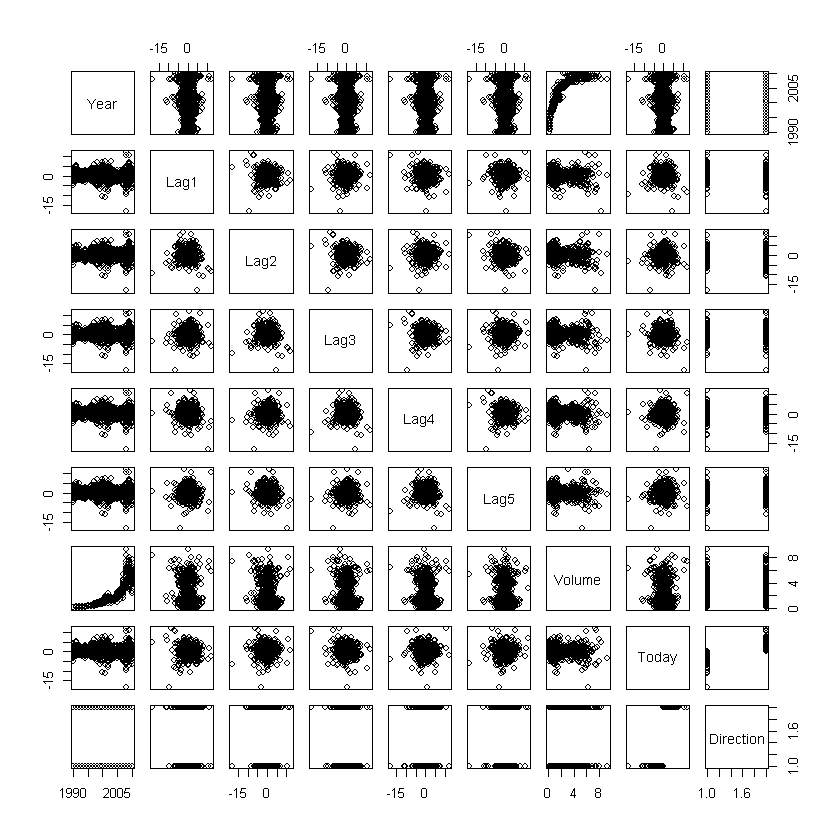

In [2]:
pairs(Weekly)

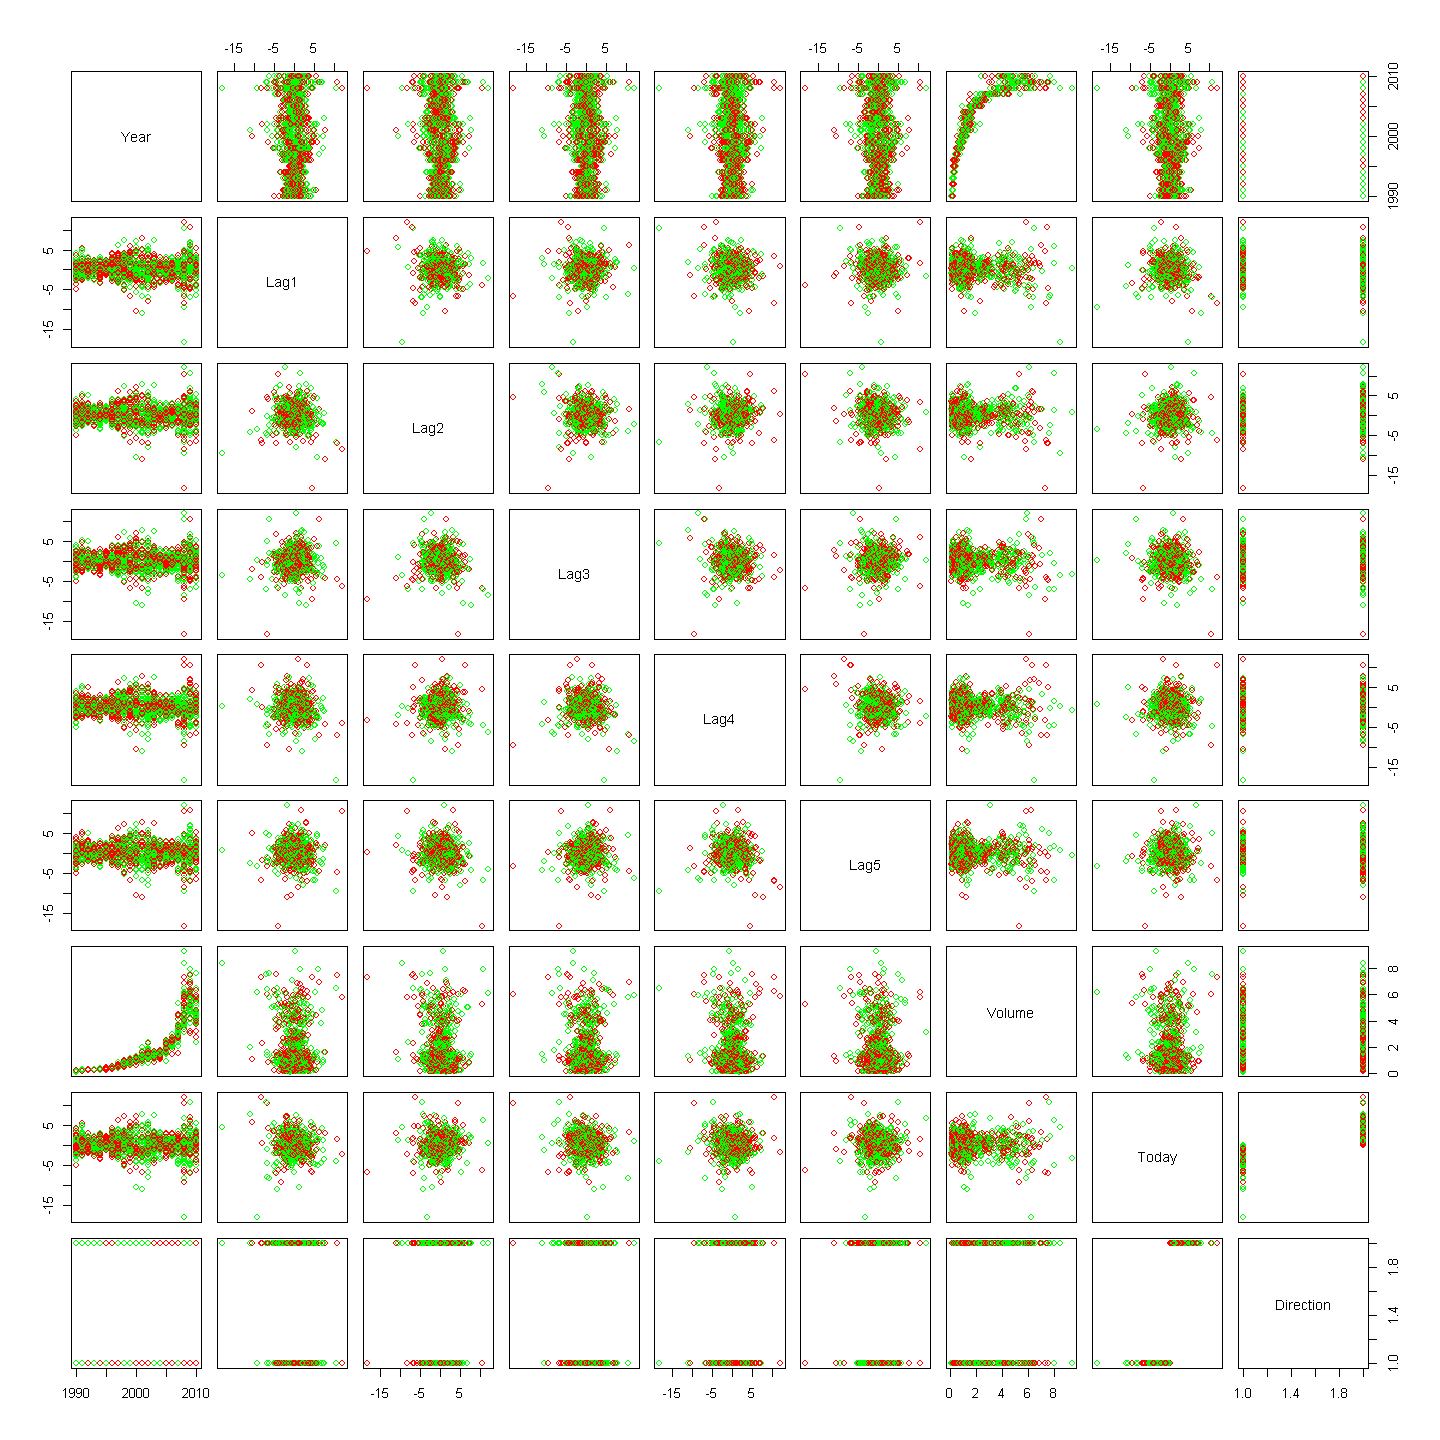

In [3]:
# Pair plot
options(repr.plot.width=12, repr.plot.height=12)
cols <- rep('green', nrow(Smarket))  # Up
cols[Smarket$Direction == 'Down'] <- 'red'  # Down
pairs(Weekly, col=cols)

In [4]:
#b
md_logreg <- glm(Direction ∼ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,data=Weekly, family=binomial)
summary(md_logreg)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [5]:
#c)

pred_train_prob <- predict(md_logreg, newdata=Weekly, type='response')
head(pred_train_prob)

# Evaluation model on train
threshold <- 0.5  # Decision threshold
pred_train <- rep('Down', length(pred_train_prob))
pred_train[pred_train_prob > threshold] <- 'Up'

# Confusion matrix
print('Confusion matrix:')
table(pred_train, Weekly$Direction)

1         2         3         4         5         6 
0.6086249 0.6010314 0.5875699 0.4816416 0.6169013 0.5684190

[1] "Confusion matrix:"


          
pred_train Down  Up
      Down   54  48
      Up    430 557

We can conclude that the percentage of correct predictions on the training data is (54+557)/1089 wich is equal to 56.1%. In other words 43.9% is the training error rate.

In [7]:
#d)
train = (Weekly$Year < 2009)
md2 = glm(Direction ~ Lag2, data = Weekly, subset = train, family = "binomial")
summary(md2)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [8]:
md2probs = predict(md2, Weekly[!train, ], type = "response")
md2pred = rep("Down", dim(Weekly[!train, ])[1])
md2pred[md2probs > 0.5] = "Up"
table(md2pred, Weekly[!train, ]$Direction)

       
md2pred Down Up
   Down    9  5
   Up     34 56

In [9]:
#e)
library(MASS)
md2lda <- lda(Direction ~ Lag2, data = Weekly, subset = train)
md2lda

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [10]:
md2lda2 = predict(md2lda, Weekly[!train, ])
table(md2lda2$class, Weekly[!train, ]$Direction)

mean(md2lda2$class == Weekly[!train, ]$Direction)

      
       Down Up
  Down    9  5
  Up     34 56

[1] 0.625

In [11]:
#f)

md3qda = qda(Direction ~ Lag2, data = Weekly, subset = train)
md3qda

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [12]:
md3qda3 = predict(md3qda, Weekly[!train, ])
table(md3qda3$class, Weekly[!train, ]$Direction)

mean(md3qda3$class == Weekly[!train, ]$Direction)

      
       Down Up
  Down    0  0
  Up     43 61

[1] 0.5865385

In [13]:
#g)

library(class)
train.X = data.frame(Weekly[train, ]$Lag2)
test.X = data.frame(Weekly[!train, ]$Lag2)
train.Direction = Weekly[train, ]$Direction

In [14]:
knn1_pred = knn(train.X, test.X, train.Direction, k = 1)
table(knn1_pred, Weekly[!train, ]$Direction)

# Accuracy
acc <- mean(knn1_pred == Weekly$Direction)
acc

         
knn1_pred Down Up
     Down   21 30
     Up     22 31

Warning message in `==.default`(knn1_pred, Weekly$Direction):
"longer object length is not a multiple of shorter object length"
Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"


[1] 0.5050505

#h)

Considering overall prediction accuracy, it appears that logistic regression and 
linear discriminant analysis were equally good as the models that performed the best on this data

Q11)In this problem, you will develop 
a model to predict whether a given car gets high or low gas mileage based on the “Auto” data set.

In [15]:
install.packages(c('MASS'))

library(MASS)

Warning message:
"package 'MASS' is in use and will not be installed"


In [16]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500
7,14,8,454,220,4354,9.0,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10.0,70,1,pontiac catalina


In [17]:
mpg01 = rep(0, dim(Auto)[1])
mpg01[Auto$mpg > median(Auto$mpg)] = 1
Auto = data.frame(Auto, mpg01)
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


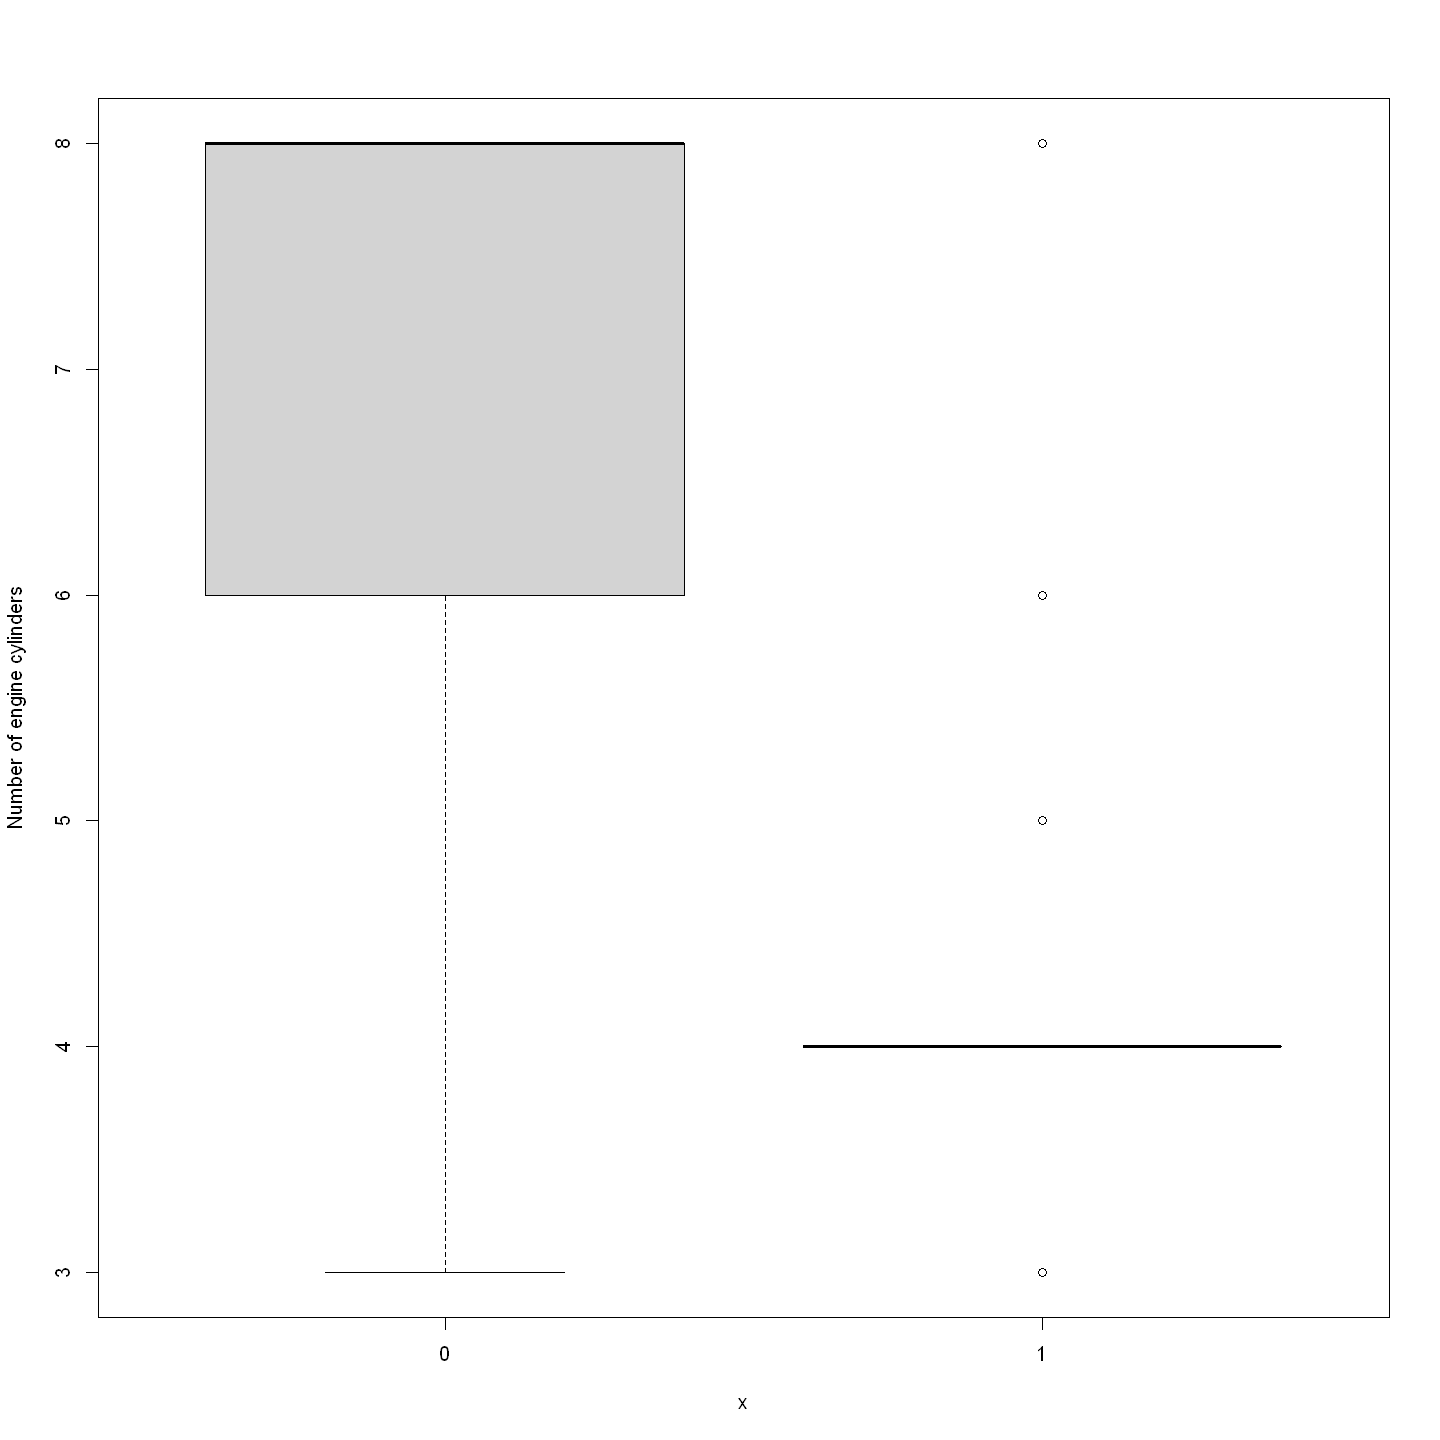

In [19]:
plot(factor(Auto$mpg01), Auto$cylinders, ylab = "Number of engine cylinders")

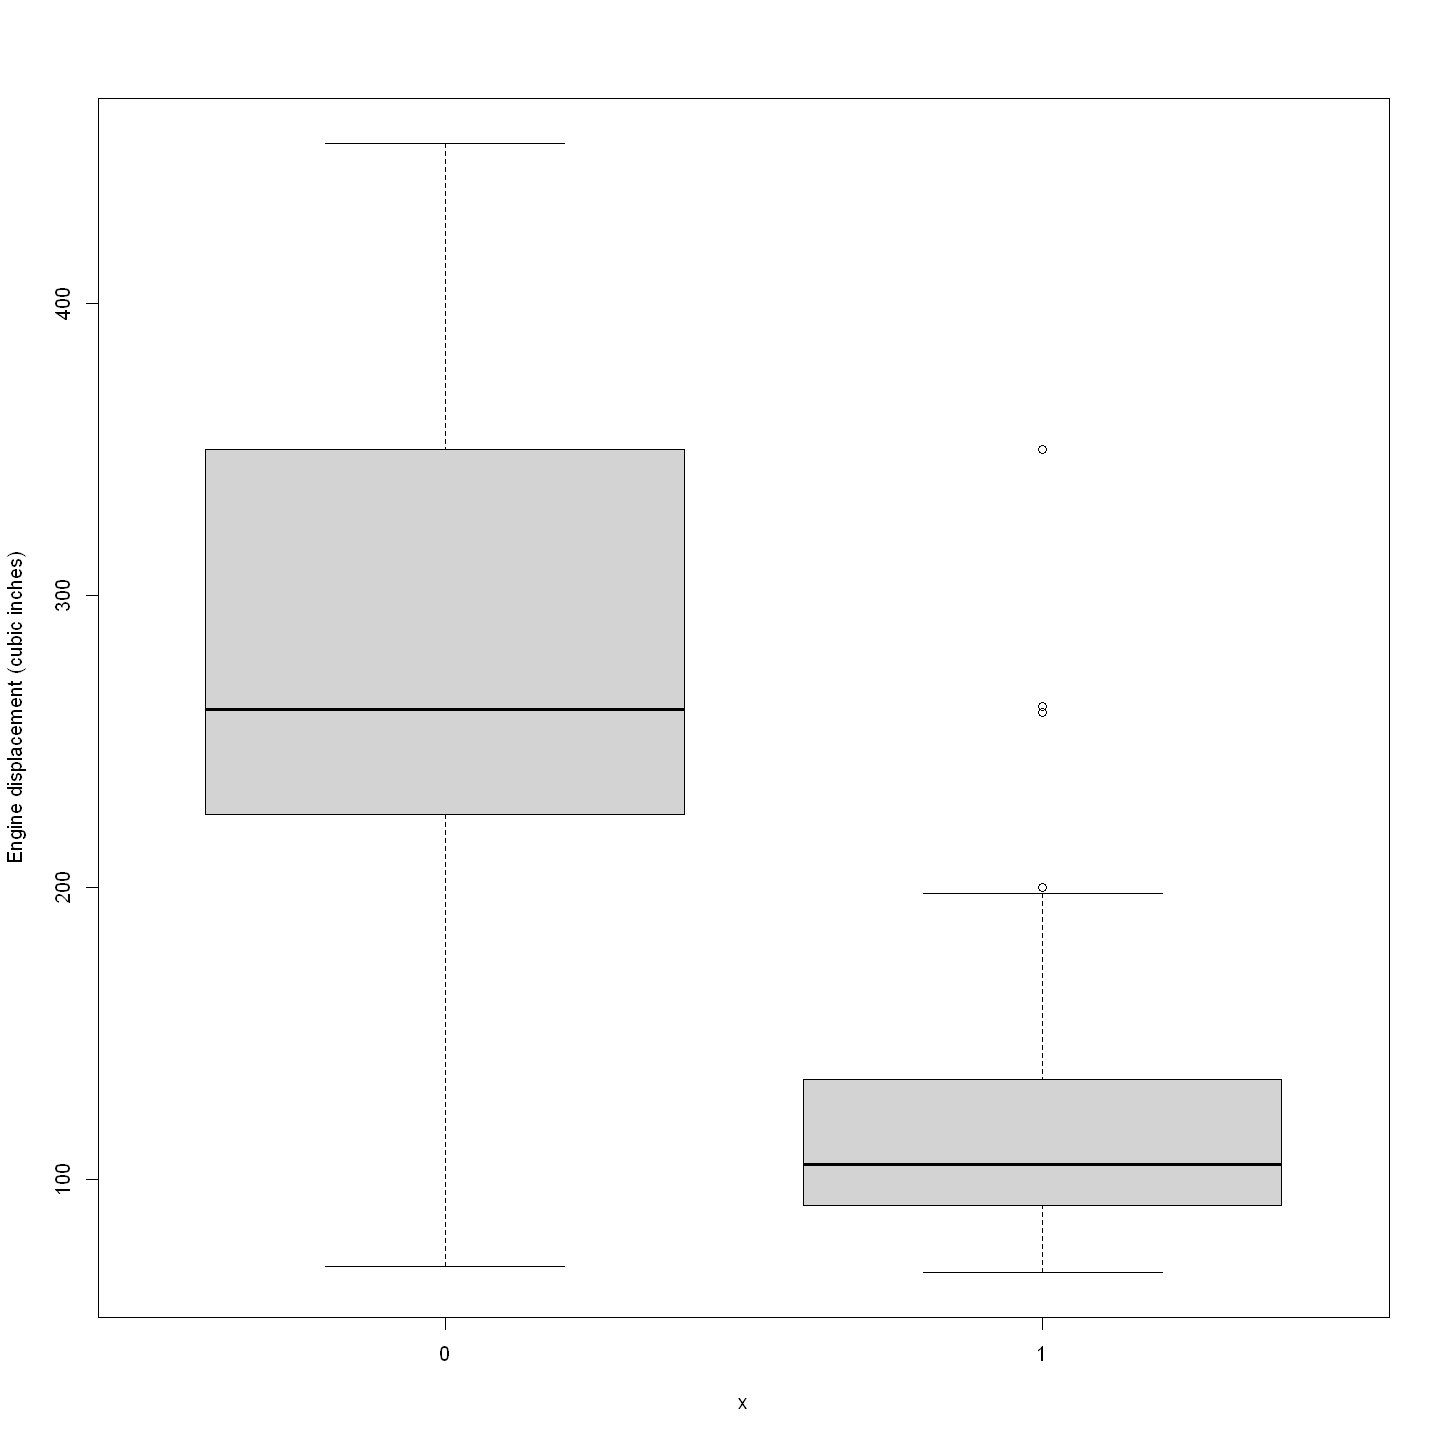

In [20]:
plot(factor(Auto$mpg01), Auto$displacement, ylab = "Engine displacement (cubic inches)")

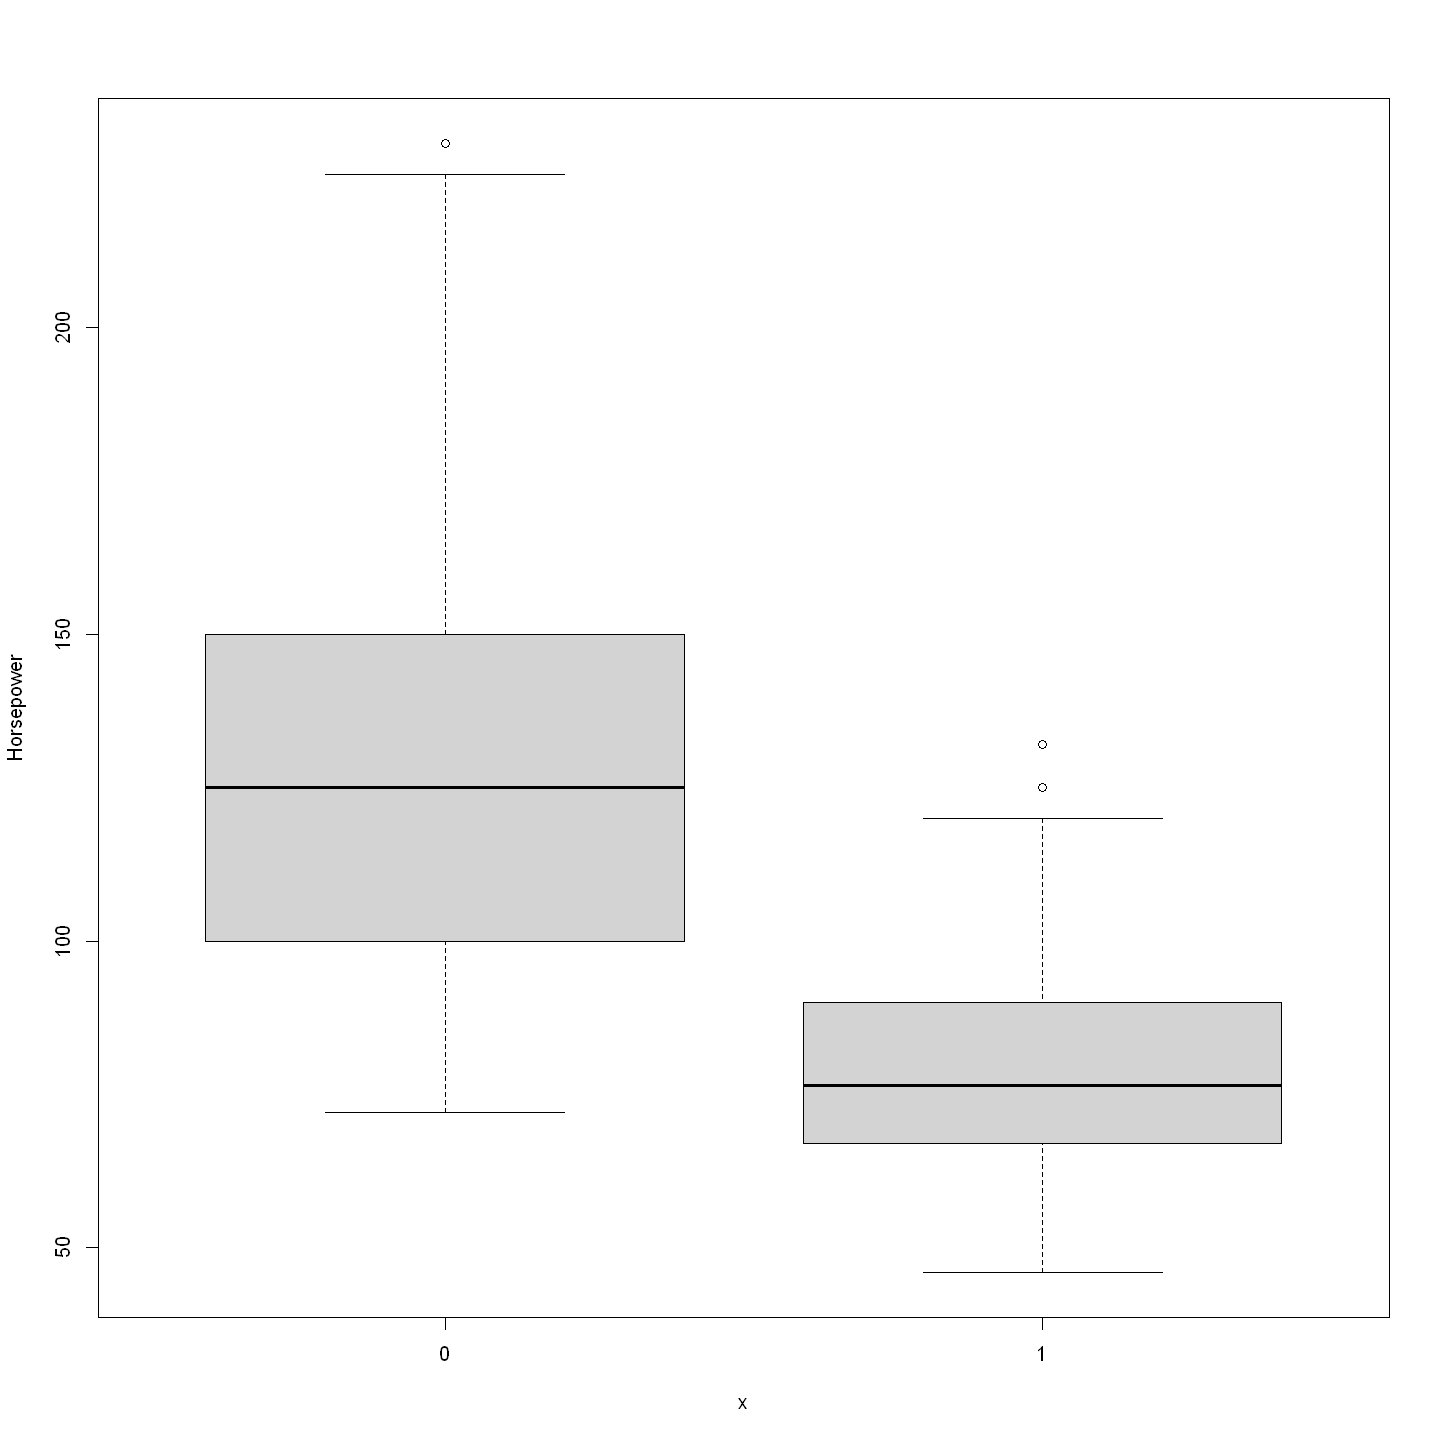

In [21]:
plot(factor(Auto$mpg01), Auto$horsepower, ylab = "Horsepower")

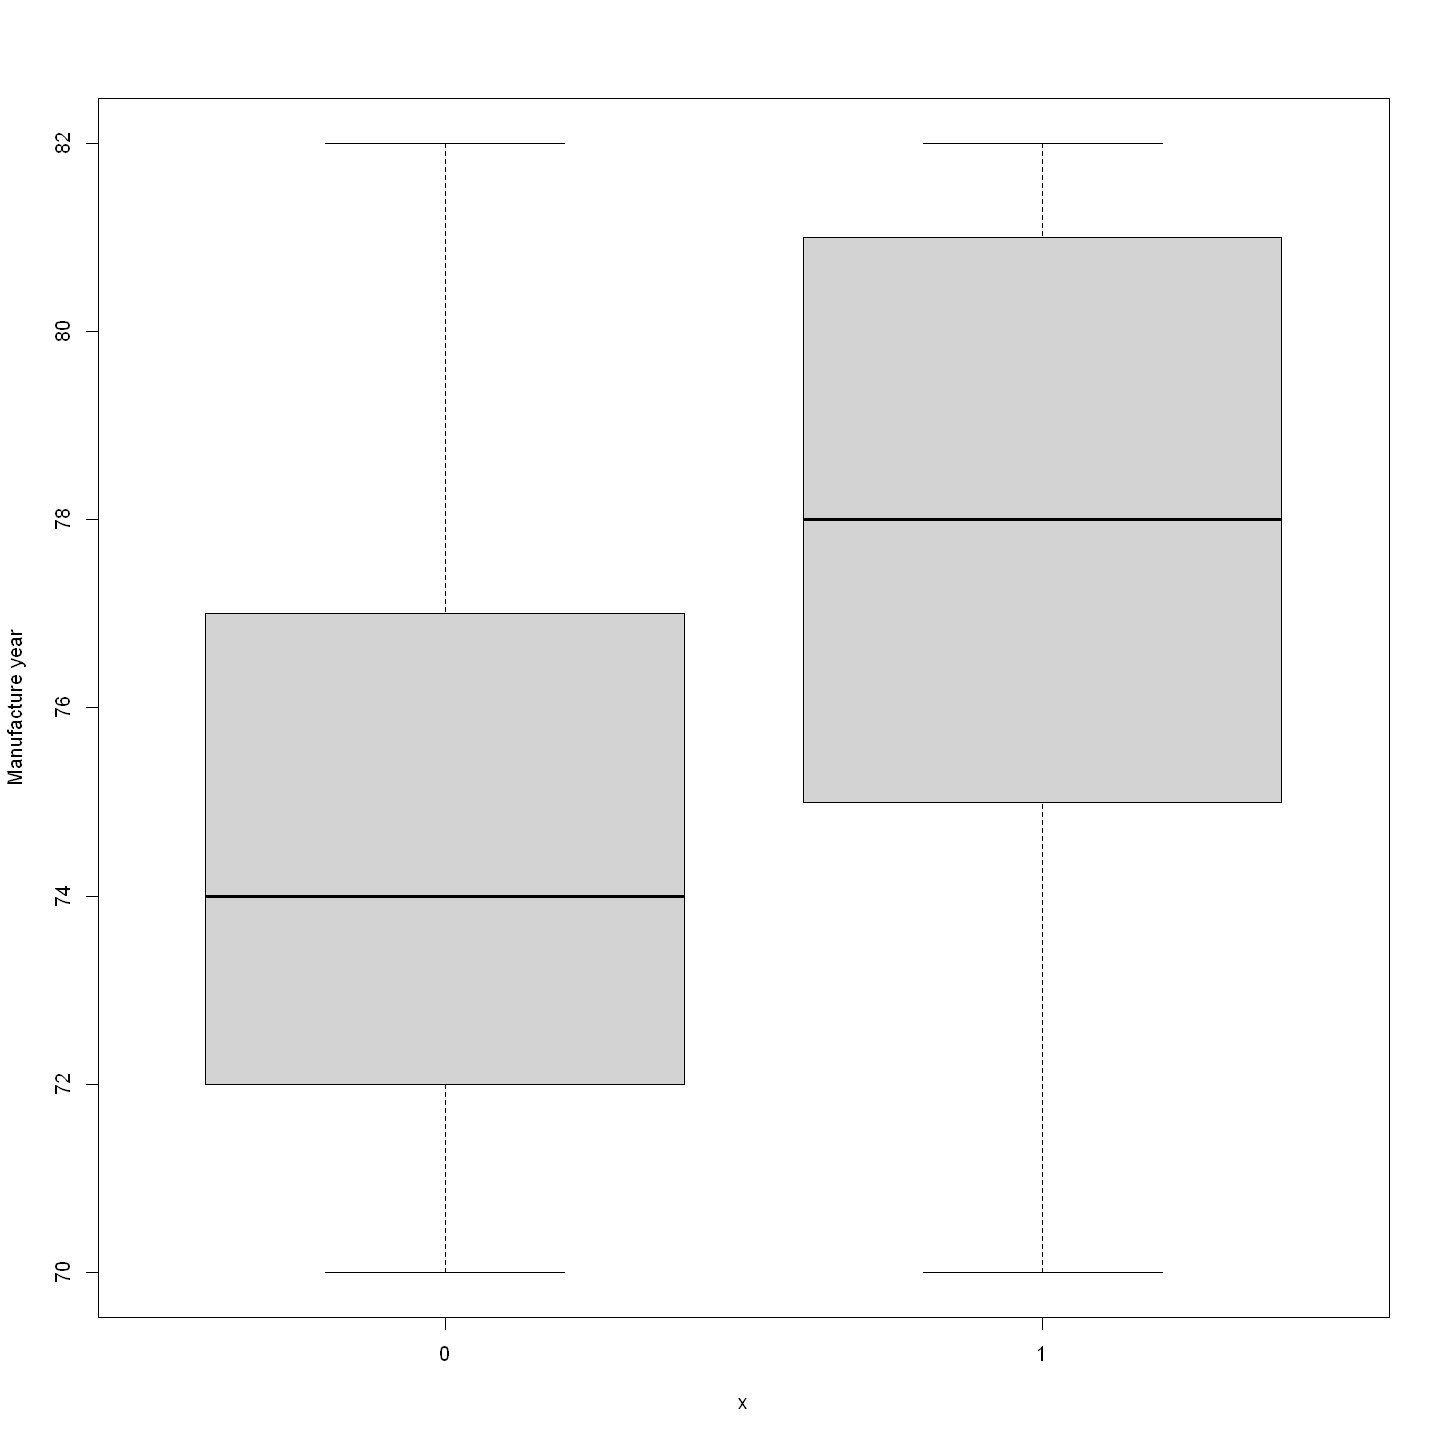

In [22]:
plot(factor(Auto$mpg01), Auto$year, ylab = "Manufacture year")

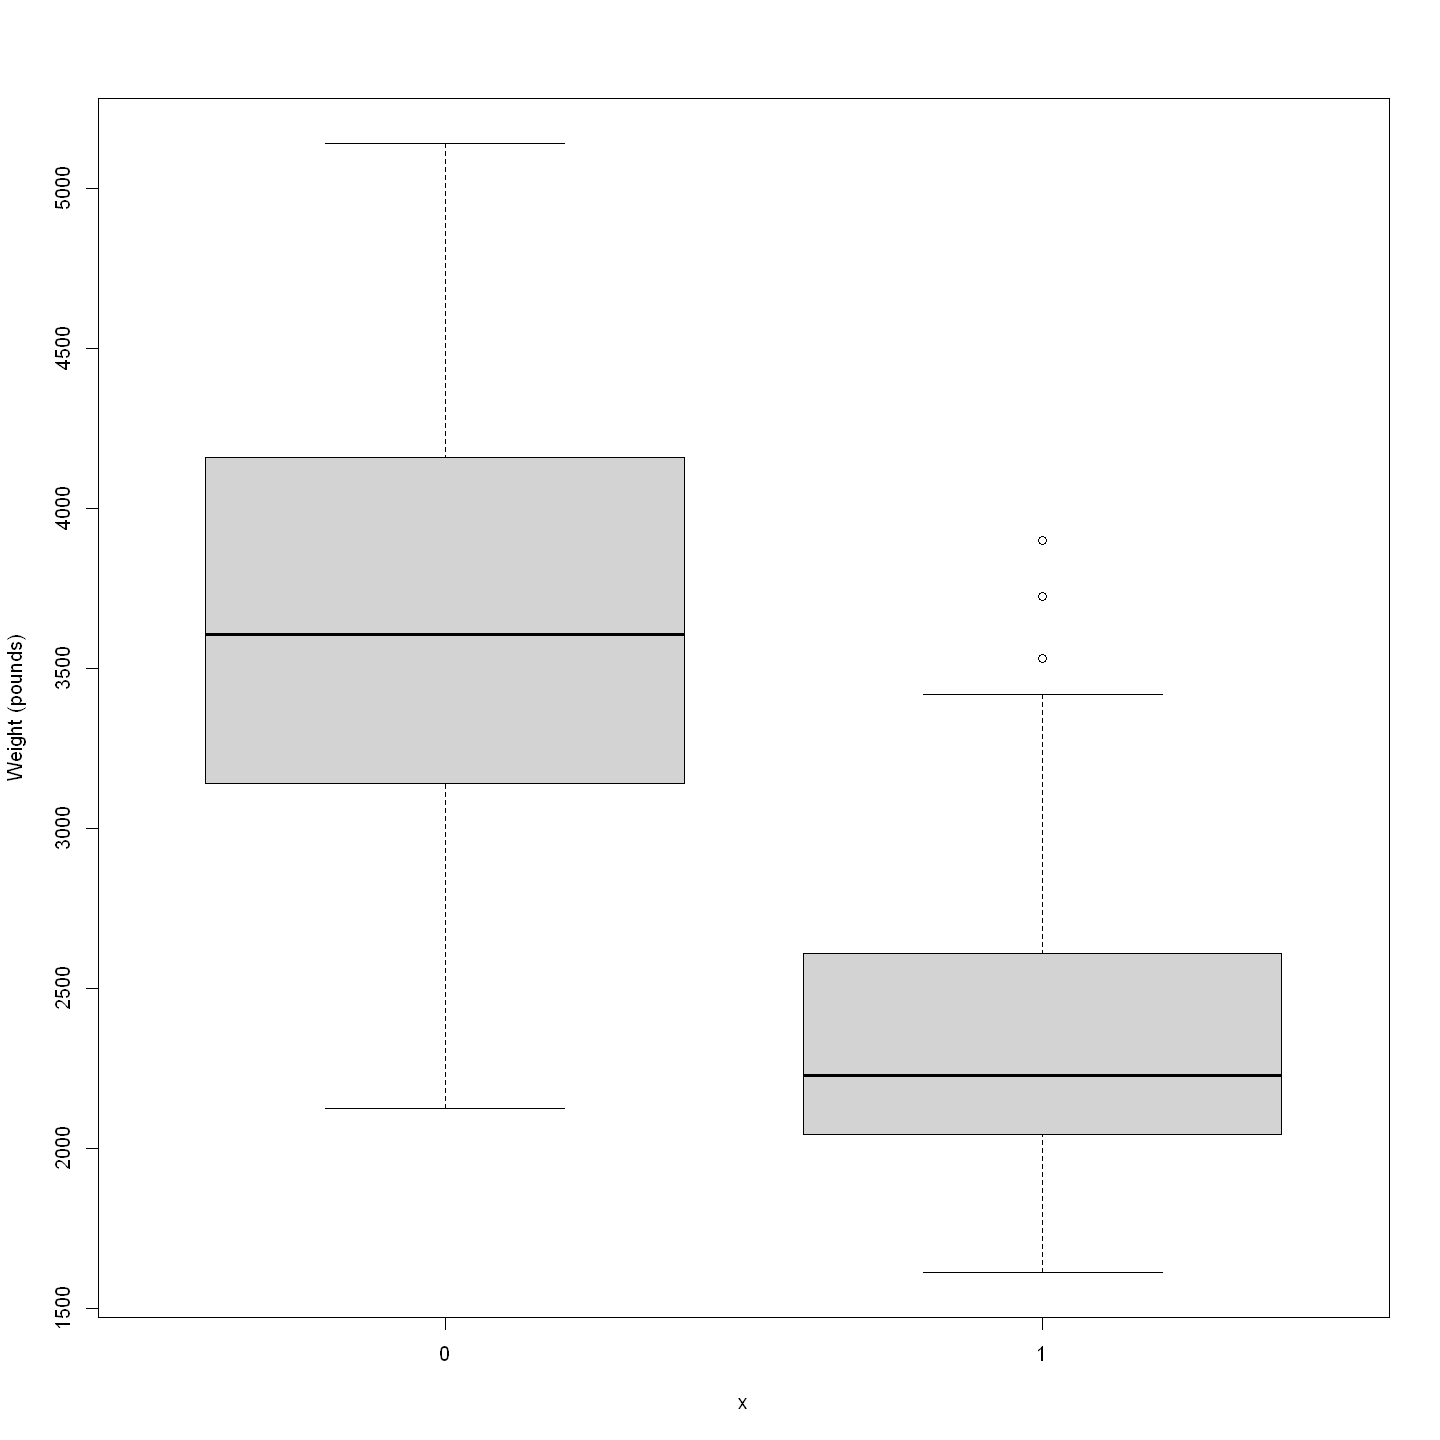

In [23]:
plot(factor(Auto$mpg01), Auto$weight, ylab = "Weight (pounds)")

There exists some association between mpg01 and cylinders, weight, displacement and horsepower.

In [45]:
#c)
train <- (Auto$year %% 2 == 0)
Auto.train <- Auto[train, ]
Auto.test <- Auto[!train, ]
mpg01.test <- mpg01[!train]

In [46]:
#d)
md_lda <- lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto.train, subset = train)
md_lda

Call:
lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto.train, 
    subset = train)

Prior probabilities of groups:
       0        1 
0.460177 0.539823 

Group means:
  cylinders   weight displacement horsepower
0  6.942308 3575.673     281.5769  138.19231
1  4.065574 2344.984     115.3279   80.98361

Coefficients of linear discriminants:
                       LD1
cylinders    -1.206799e+00
weight       -7.717071e-04
displacement  7.044876e-05
horsepower    1.415867e-02

In [47]:
md_lda1 <- predict(md_lda, Auto.test)
table(md_lda1$class, mpg01.test)


   mpg01.test
     0  1
  0 88 11
  1 12 71

In [48]:
mean(md_lda1$class != mpg01.test)

[1] 0.1263736

In [49]:
#e)
md_qda <- qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto.train, subset = train)
md_qda

Call:
qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto.train, 
    subset = train)

Prior probabilities of groups:
       0        1 
0.460177 0.539823 

Group means:
  cylinders   weight displacement horsepower
0  6.942308 3575.673     281.5769  138.19231
1  4.065574 2344.984     115.3279   80.98361

In [50]:
md_qda1 <- predict(md_qda, Auto.test)
table(md_qda1$class, mpg01.test)

   mpg01.test
     0  1
  0 88 13
  1 12 69

In [51]:
mean(md_qda1$class != mpg01.test)

[1] 0.1373626

In [52]:
#f)

md_lm <- glm(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto.train, family = binomial, subset = train)
summary(md_lm)


Call:
glm(formula = mpg01 ~ cylinders + weight + displacement + horsepower, 
    family = binomial, data = Auto.train, subset = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.50446  -0.00344   0.05206   0.19430   3.03475  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  28.689353   7.931660   3.617 0.000298 ***
cylinders    -3.084223   1.322570  -2.332 0.019701 *  
weight       -0.002976   0.002769  -1.075 0.282504    
displacement  0.026065   0.028931   0.901 0.367620    
horsepower   -0.097560   0.057168  -1.707 0.087904 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 155.934  on 112  degrees of freedom
Residual deviance:  25.209  on 108  degrees of freedom
  (97 observations deleted due to missingness)
AIC: 35.209

Number of Fisher Scoring iterations: 9


In [53]:
pred_train_prob <- predict(md_lm, newdata=Auto.train, type='response')
head(pred_train_prob)

pred_test_prob <- predict(md_lm, newdata=Auto.train, type='response')
head(pred_test_prob)

1            2            3            4            5            6 
1.520392e-05 8.739493e-07 3.523549e-06 2.468184e-06 5.925879e-06 3.980920e-08

1            2            3            4            5            6 
1.520392e-05 8.739493e-07 3.523549e-06 2.468184e-06 5.925879e-06 3.980920e-08

In [56]:
# Evaluation model on train
threshold <- 0.5  # Decision threshold
pred_test <- rep('Down', length(pred_test_prob))
pred_test[pred_test_prob > threshold] <- 'Up'

# Confusion matrix
print('Confusion matrix:')
table(pred_test, Auto.train$mpg01)


[1] "Confusion matrix:"


         
pred_test   0   1
     Down  87   4
     Up     9 110

In [59]:
#g) #K=1

set.seed(123)
knn1_pred <- knn(train=Auto.train[, c('cylinders', 'weight')],
                 test=Auto.test[, c('cylinders', 'weight')],
                 cl=Auto.train$mpg01,
                 k=1)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, Auto.test$mpg01)

# Accuracy
acc <- mean(knn1_pred == Auto.test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred  0  1
        0 81 12
        1 19 70

[1] "Accuracy = 0.83 %"


In [60]:
#g) #K=5

set.seed(123)
knn1_pred <- knn(train=Auto.train[, c('cylinders', 'weight')],
                 test=Auto.test[, c('cylinders', 'weight')],
                 cl=Auto.train$mpg01,
                 k=5)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, Auto.test$mpg01)

# Accuracy
acc <- mean(knn1_pred == Auto.test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred  0  1
        0 80  9
        1 20 73

[1] "Accuracy = 0.84 %"


In [62]:
#g) #K=10

set.seed(123)
knn1_pred <- knn(train=Auto.train[, c('cylinders', 'weight')],
                 test=Auto.test[, c('cylinders', 'weight')],
                 cl=Auto.train$mpg01,
                 k=10)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, Auto.test$mpg01)

# Accuracy
acc <- mean(knn1_pred == Auto.test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred  0  1
        0 82  7
        1 18 75

[1] "Accuracy = 0.86 %"


In [63]:
#g) #K=100

set.seed(123)
knn1_pred <- knn(train=Auto.train[, c('cylinders', 'weight')],
                 test=Auto.test[, c('cylinders', 'weight')],
                 cl=Auto.train$mpg01,
                 k=100)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, Auto.test$mpg01)

# Accuracy
acc <- mean(knn1_pred == Auto.test$mpg01)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred  0  1
        0 80  8
        1 20 74

[1] "Accuracy = 0.85 %"
